## Analyzing generated dataset

### Import data

In [1]:
import os
import sys
project_root = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'model'))
sys.path.insert(0, os.path.join(project_root, 'dataset_generation'))

In [2]:
from importlib import reload
import analysis_util
reload(analysis_util)

<module 'analysis_util' from '/Users/luis/Desktop/Cranmer 2024/Workplace/smallMutations/similar-expressions/src/datagen_jl/analysis_util.py'>

In [25]:
from analysis_util import analyze_outliers, plot_value_distributions, analyze_sequences, analyze_syntax_tokens, plot_values
import pandas as pd
import numpy as np
import torch
import h5py

datapath = '/Users/luis/Desktop/Cranmer 2024/Workplace/smallMutations/similar-expressions/data'
name = 'dataset_240817_2'

with h5py.File(os.path.join(datapath, f'{name}.h5'), 'r') as f:
    # Extract onehot, values (eval_y), and consts
    syntax = f['onehot'][:].astype(np.float32)
    consts = f['consts'][:].astype(np.float32)
    val_x = f['eval_x'][:].astype(np.float32)
    val = f['eval_y'][:].astype(np.float32)
    syntax_cats = list(map(lambda x: x.decode('utf-8'), f['onehot_legend'][:]))

def value_transform(x):
    return torch.arcsinh(x)/10  # Example transformation

val_transformed = value_transform(torch.tensor(val)).detach().numpy()

### Calculate priors

In [44]:
# Calculate cross entropy prior for syntax
prod_counts = pd.Series(syntax.argmax(axis=-1).flatten()).value_counts()
p = prod_counts / prod_counts.sum()
cross_entropy_prior = -np.sum(p * np.log(p))
print(f'\n{cross_entropy_prior = }')

# Calculate MSE prior for constants
mse_prior_consts = consts.flatten().var()
print(f'{mse_prior_consts = }')

# Calculate MSE prior for values
mse_prior_values = val_transformed.var()
print(f'{mse_prior_values = }')


cross_entropy_prior = np.float64(2.4982186793345615)
mse_prior_consts = np.float32(0.064335845)
mse_prior_values = np.float32(0.06500606)


### Analyze dataset

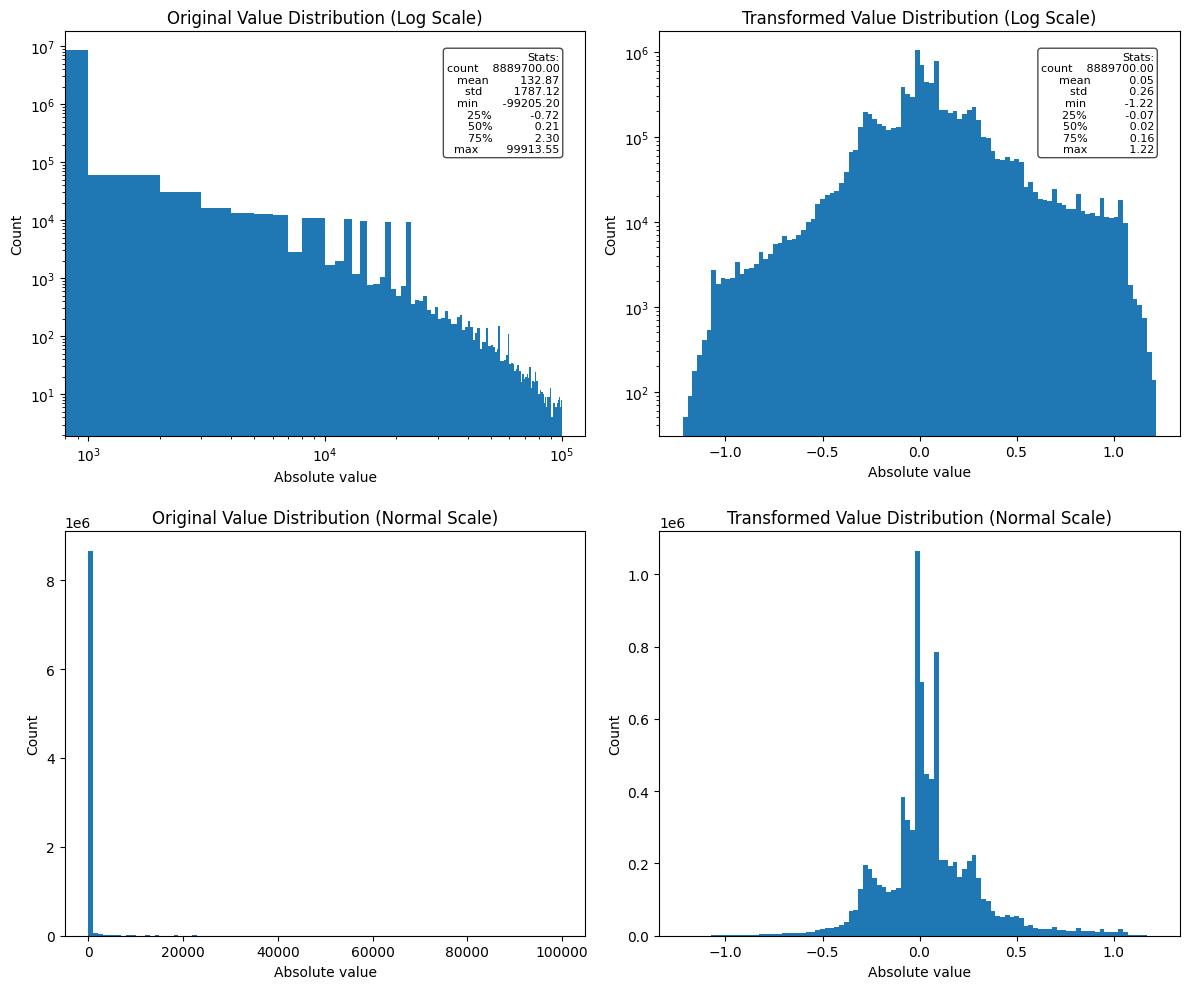

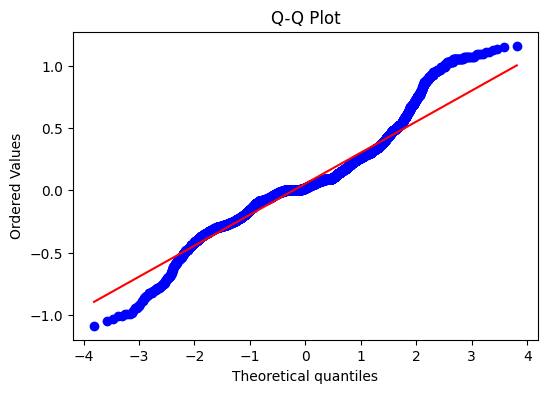

Number of outliers detected using z-score method: 196127
Number of outliers detected using IQR method: 693147


In [4]:
plot_value_distributions(val, val_transformed)
analyze_outliers(val_transformed)

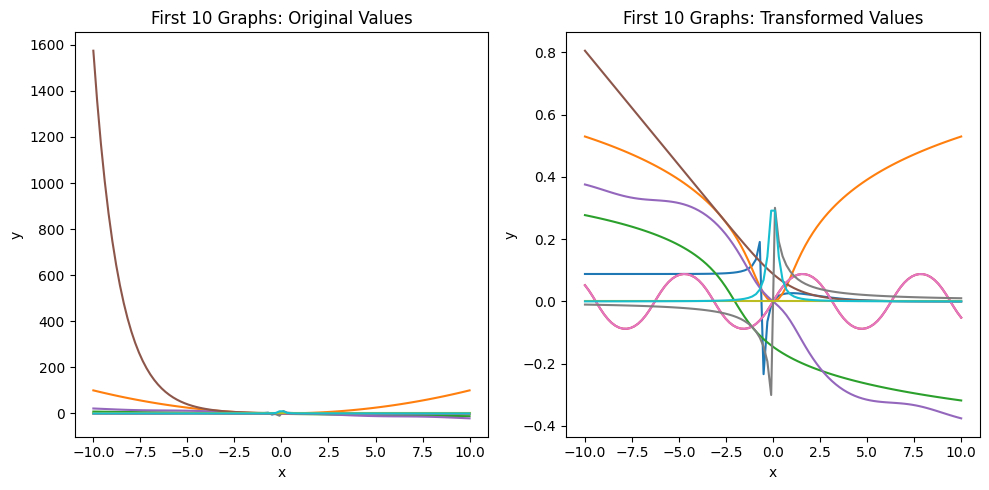

In [42]:
plot_values(val, val_transformed, idx=np.arange(10))

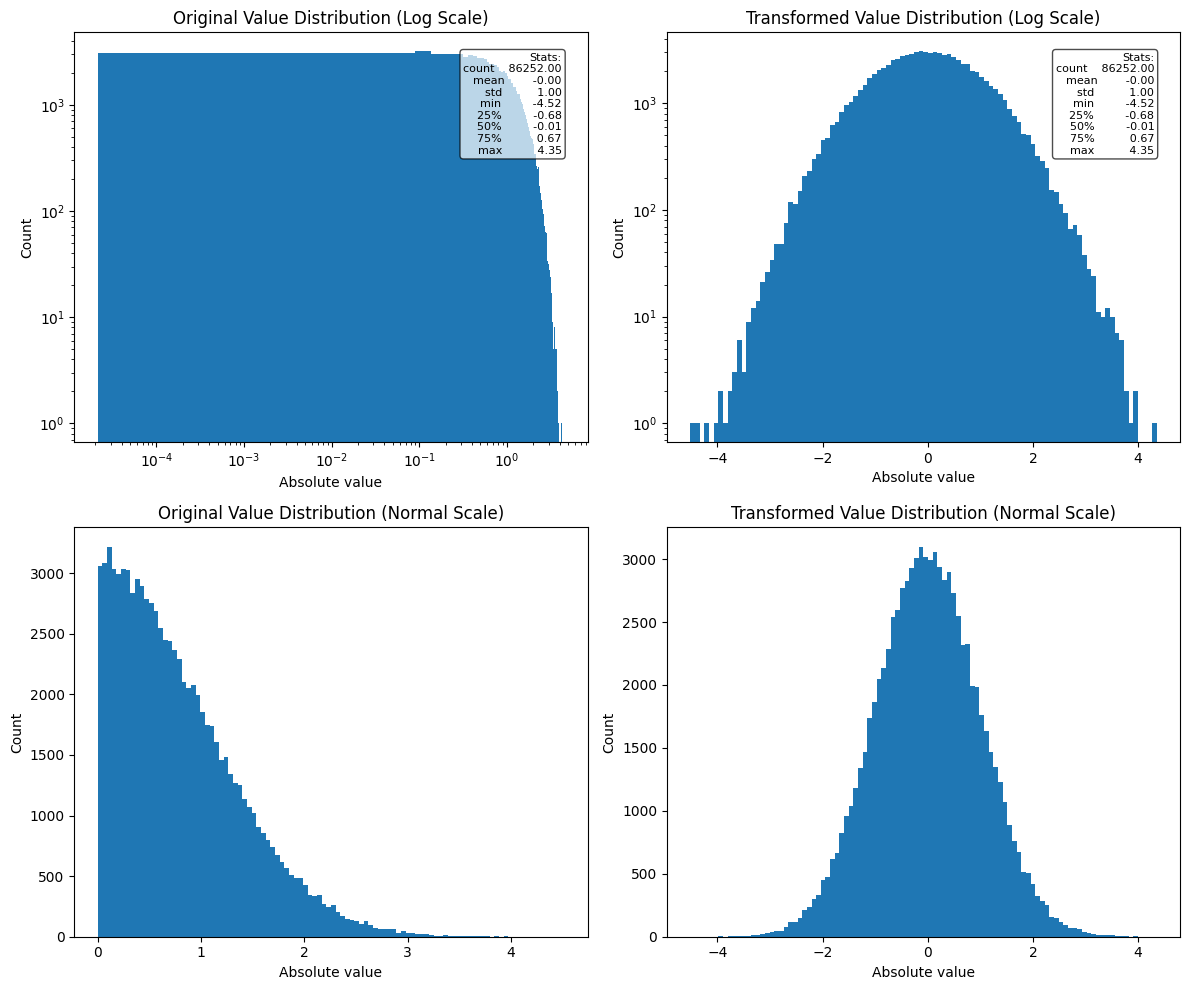

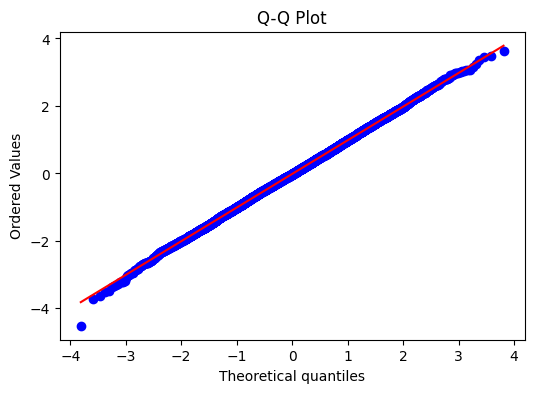

Number of outliers detected using z-score method: 233
Number of outliers detected using IQR method: 601


In [8]:
mask = (syntax[:, :, -3] == 1)  # TODO: Use dynamic encoding rules
active_consts = consts[mask]

plot_value_distributions(active_consts, active_consts)
analyze_outliers(active_consts)

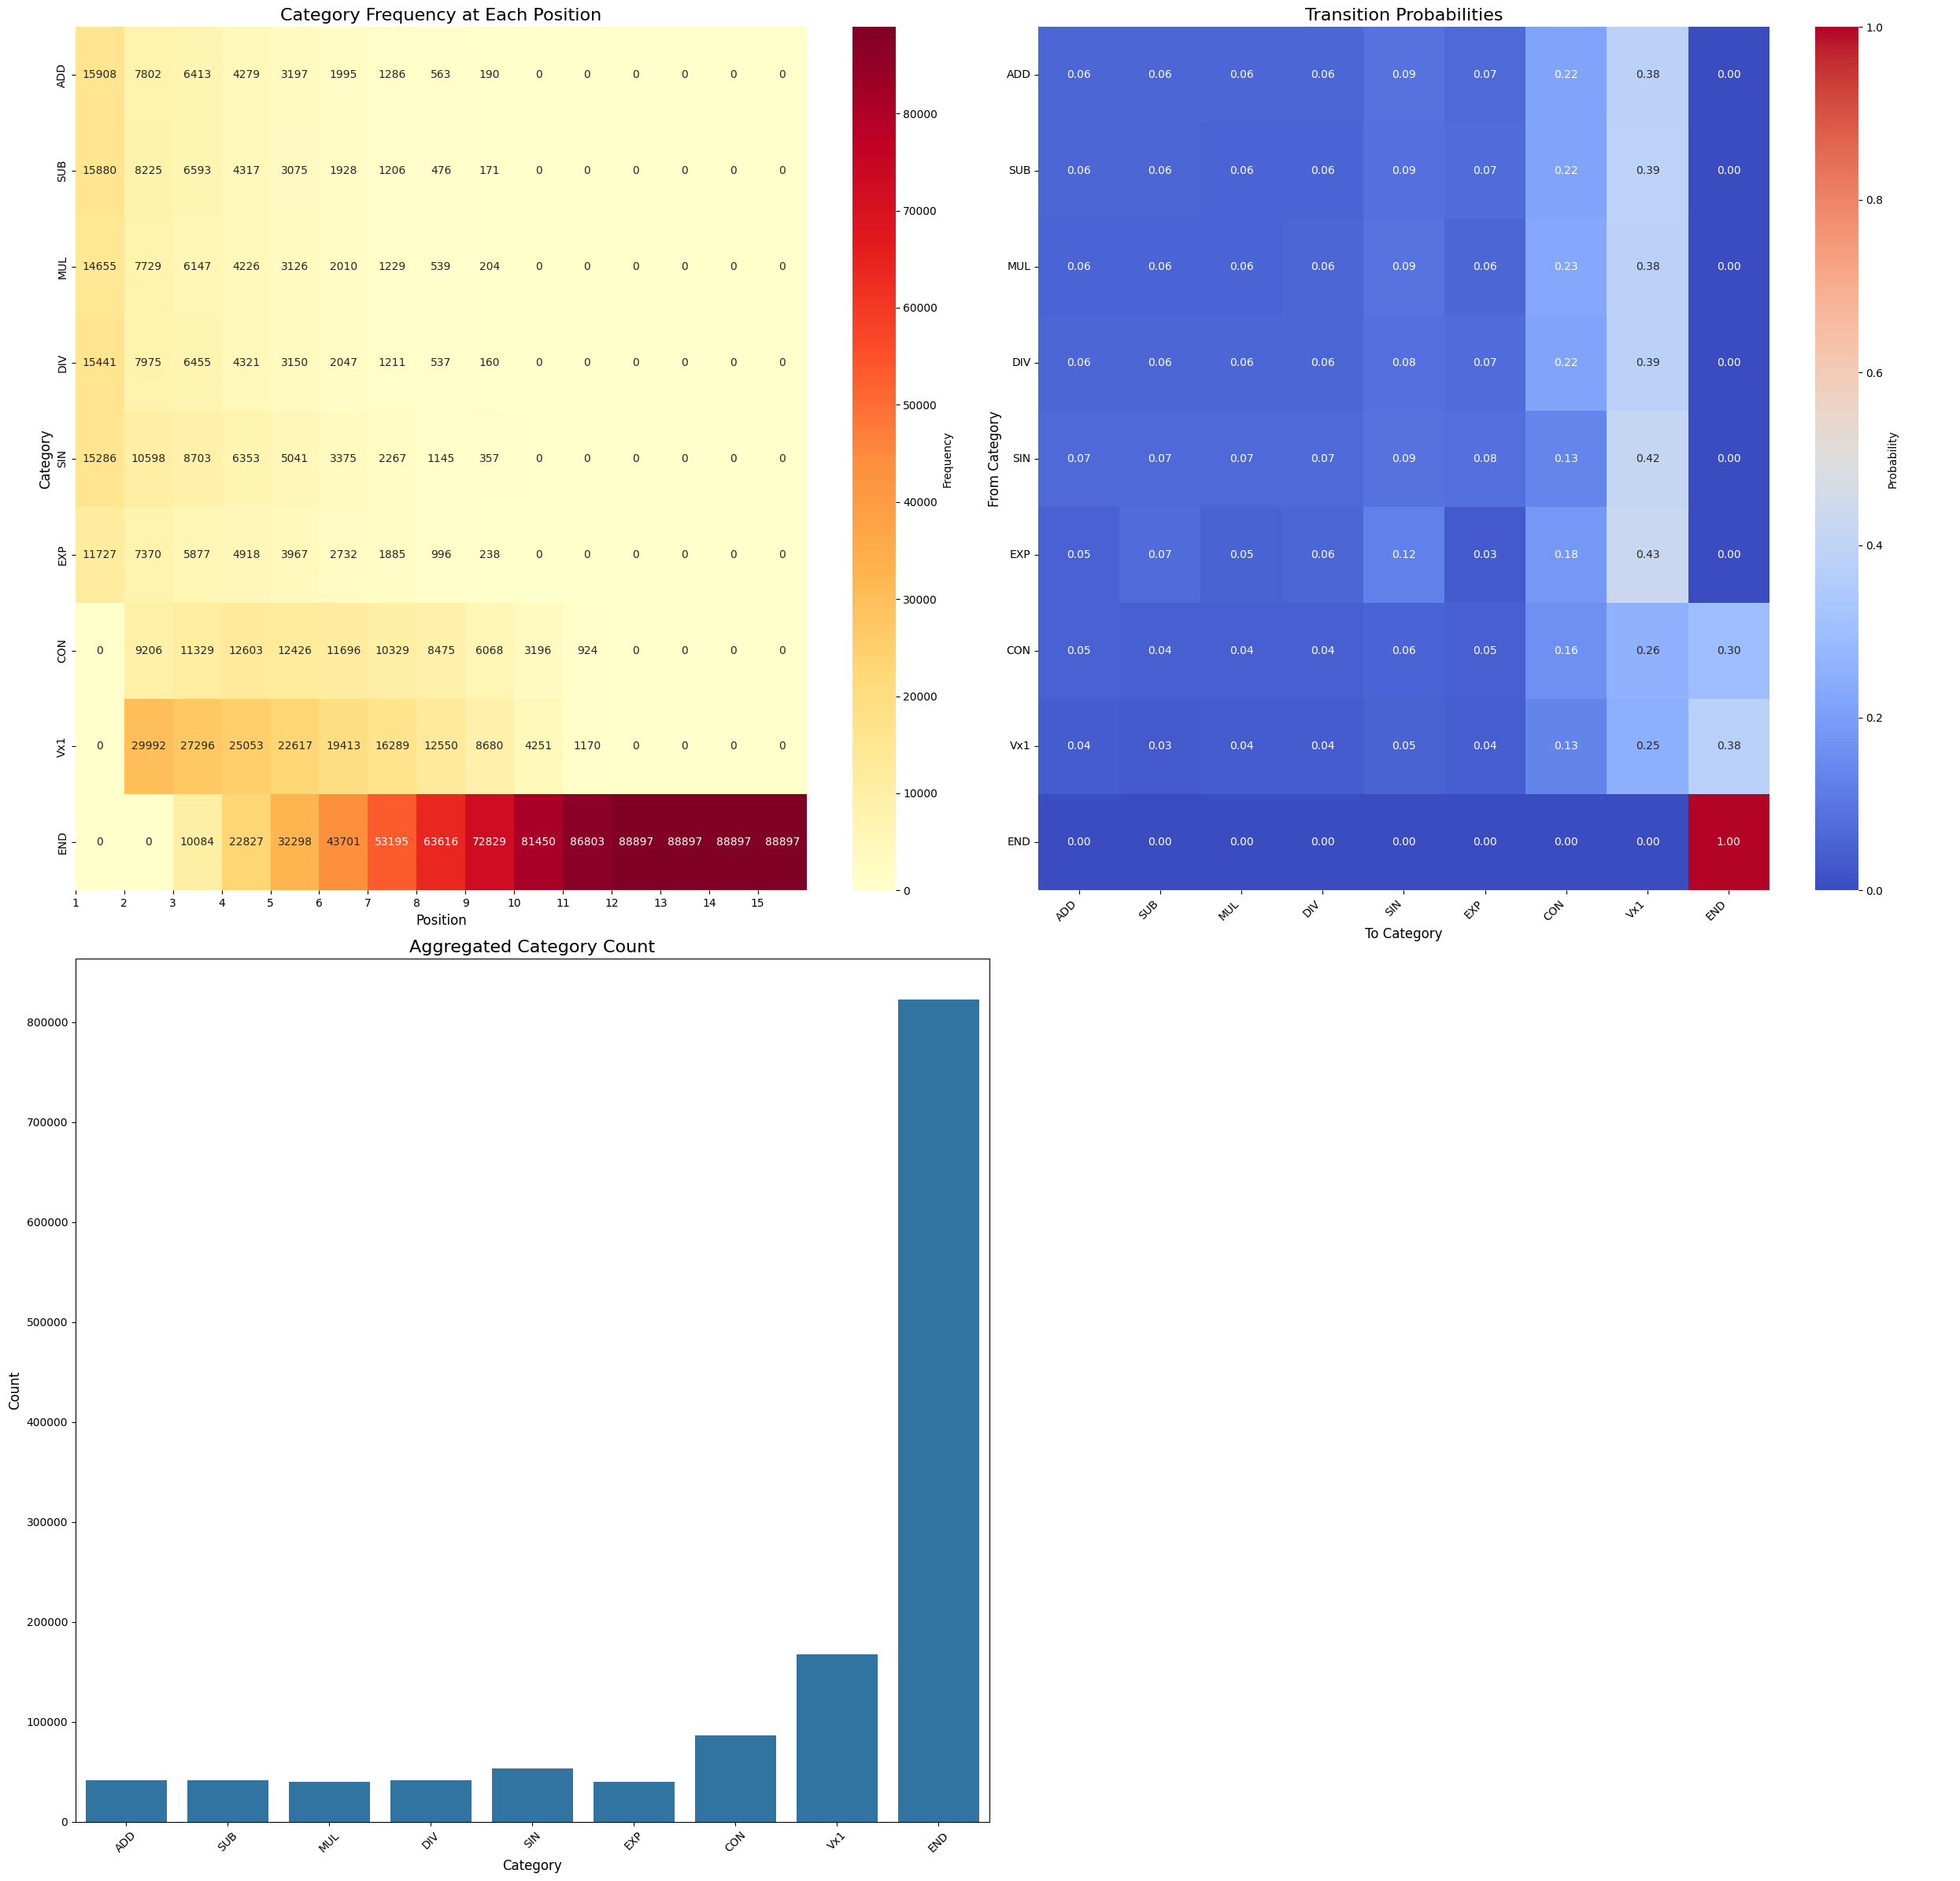

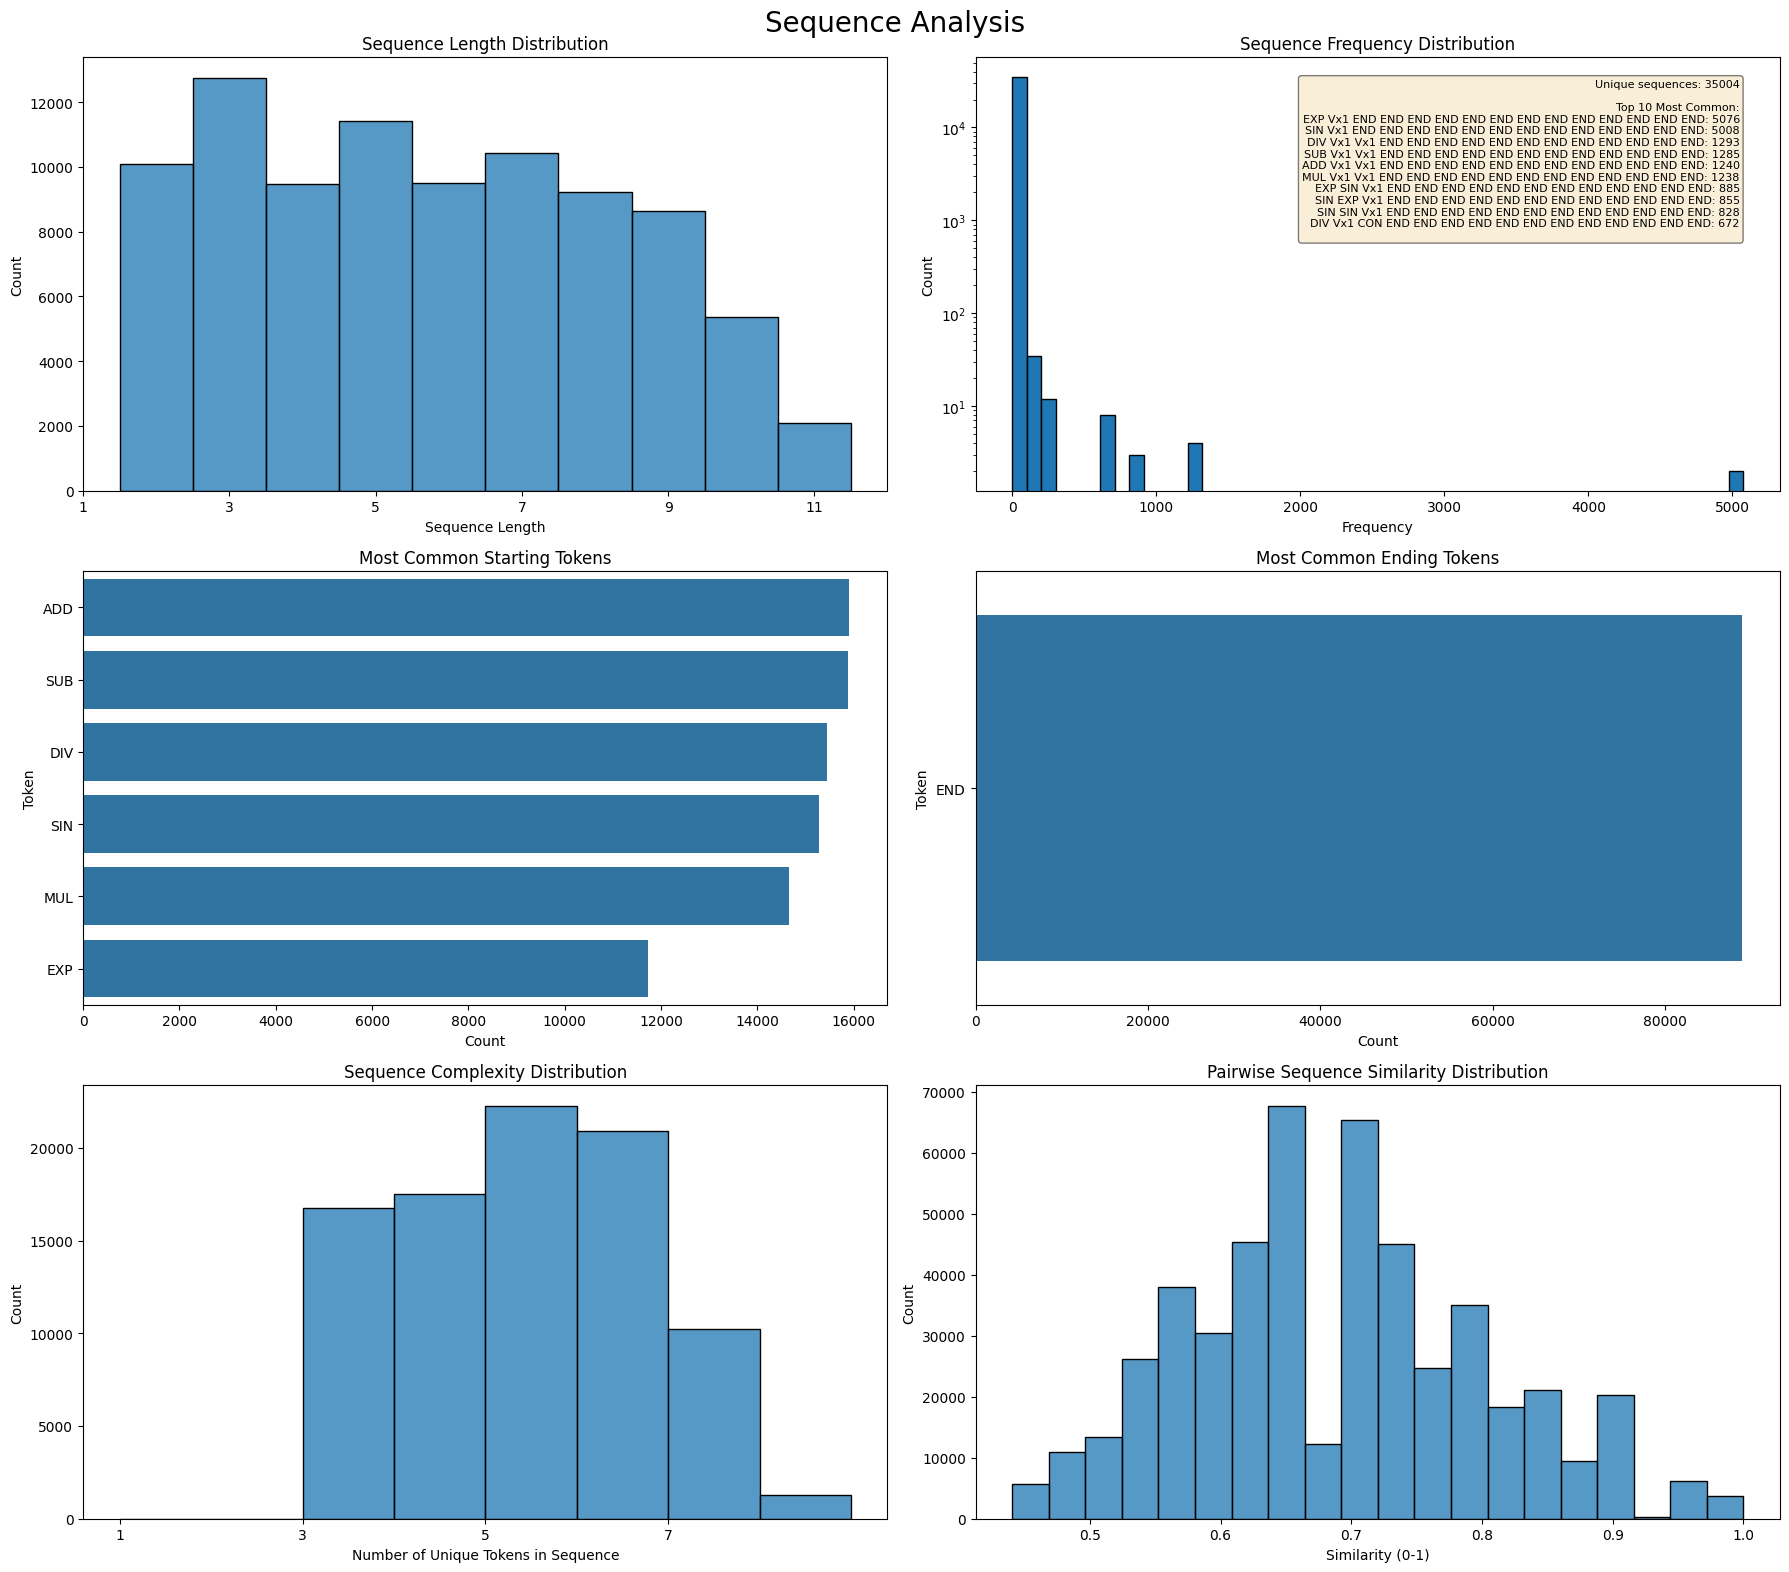

In [6]:
analyze_syntax_tokens(syntax, syntax_cats)
analyze_sequences(syntax, syntax_cats)